In [120]:
import random
import matplotlib.pyplot as plt
import time
import numpy as np

In [121]:
import numpy as np
import matplotlib.pyplot as plt
import random

class UnsupervisedLearning:
    
    def __init__(self):
        self.data_set = []

    def ex1(self, plot_flag = False):
        mean = [3, 3]
        cov = [[1, 0], [0, 1]]
        a = np.random.multivariate_normal(mean, cov, 500).T
        plt.plot(a[0], a[1], 'x')
        
        mean = [-3, -3]
        cov = [[2, 0], [0, 5]]
        b = np.random.multivariate_normal(mean, cov, 500).T
        plt.plot(b[0], b[1], 'x')
        
        c = np.concatenate((a, b), axis=1)
        c = c.T
        np.random.shuffle(c)
        c = c.T
        x = c[0]
        y = c[1]


        if plot_flag:
            plt.plot(x, y, 'x')
            plt.axis('equal')
            plt.show()
        
        self.data_set = c

    def generate_data(self):
        alpha = 0.1

        mean = [3, 3]
        cov = [[1, 0], [0, 1]]
        a = np.random.multivariate_normal(mean, cov, 500).T
        labels_a = np.ones(500)
        a = np.concatenate((a, labels_a.reshape(1, 500)), axis=0)
        
        mean = [-3, -3]
        cov = [[2, 0], [0, 5]]
        b = np.random.multivariate_normal(mean, cov, 500).T
        labels_b = np.ones(500) * 2
        b = np.concatenate((b, labels_b.reshape(1, 500)), axis=0)

        data = np.concatenate((a, b), axis=1)

        r1 = random.choice(data.T)
        r2 = random.choice(data.T)
        for x in data.T:
            if np.linalg.norm(x[:-1] - r1[:-1]) < np.linalg.norm(x[:-1] - r2[:-1]):
                r1 = (1 - alpha) * r1 + alpha * x
            else:
                r2 = (1 - alpha) * r2 + alpha * x

        return data, r1, r2

    def adapt_data(self, data, r1, r2):
        alpha = 0.001
        r1_values = [r1]
        r2_values = [r2]
        first_passage_r1 = []
        first_passage_r2 = []

        for iter in range(10):
            for x in data.T:
                if np.linalg.norm(x[:-1] - r1[:-1]) < np.linalg.norm(x[:-1] - r2[:-1]):
                    r1 = (1 - alpha) * r1 + alpha * x
                else:
                    r2 = (1 - alpha) * r2 + alpha * x
            if iter == 0:
                first_passage_r1.append(r1)
                first_passage_r2.append(r2)

            r1_values.append(r1)
            r2_values.append(r2)

        return r1_values, r2_values, first_passage_r1, first_passage_r2
    
    def plot_data(self, data, r1_values, r2_values, first_passage_r1, first_passage_r2):
        plt.scatter(data[0, :], data[1, :], alpha=0.5)

        r1_values = np.array(r1_values)
        r2_values = np.array(r2_values)

        plt.plot(r1_values[:, 0], r1_values[:, 1], 'rx', label='r1 values')
        plt.plot(r2_values[:, 0], r2_values[:, 1], 'bx', label='r2 values')

        plt.plot(first_passage_r1[0][0], first_passage_r1[0][1], 'ro', label='First passage r1')
        plt.plot(first_passage_r2[0][0], first_passage_r2[0][1], 'bo', label='First passage r2')

        plt.legend()
        plt.show()

    def run(self):
        data, r1, r2 = self.generate_data()
        r1_values, r2_values, first_passage_r1, first_passage_r2 = self.adapt_data(data, r1, r2)
        self.plot_data(data, r1_values, r2_values, first_passage_r1, first_passage_r2)

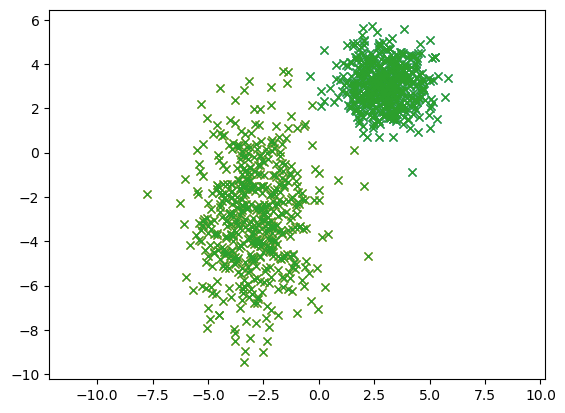

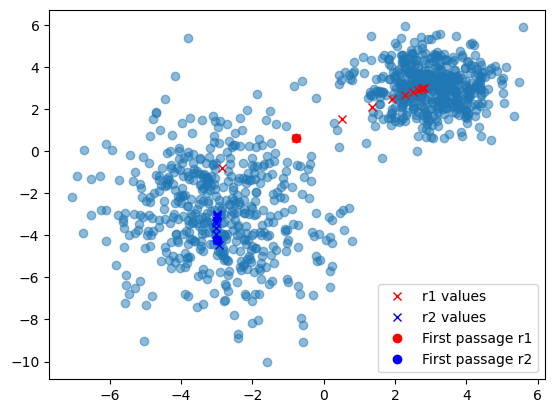

In [122]:
if __name__ == "__main__":
    np.random.seed(2137) 
    learner = UnsupervisedLearning()
    learner.ex1(plot_flag= True)
    # a)
    learner.run()